In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve, auc

# Data observation

In [2]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/HR_analytics/'
filename01 = 'HR_comma_sep.csv'

df_full = pd.read_csv(os.path.join(filepath, filename01))

In [3]:
df_full #target是目標是否left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df_full.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df_full['left'].value_counts() #這個是target

0    11428
1     3571
Name: left, dtype: int64

In [7]:
df_dum = pd.get_dummies(df_full)
df_dum.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


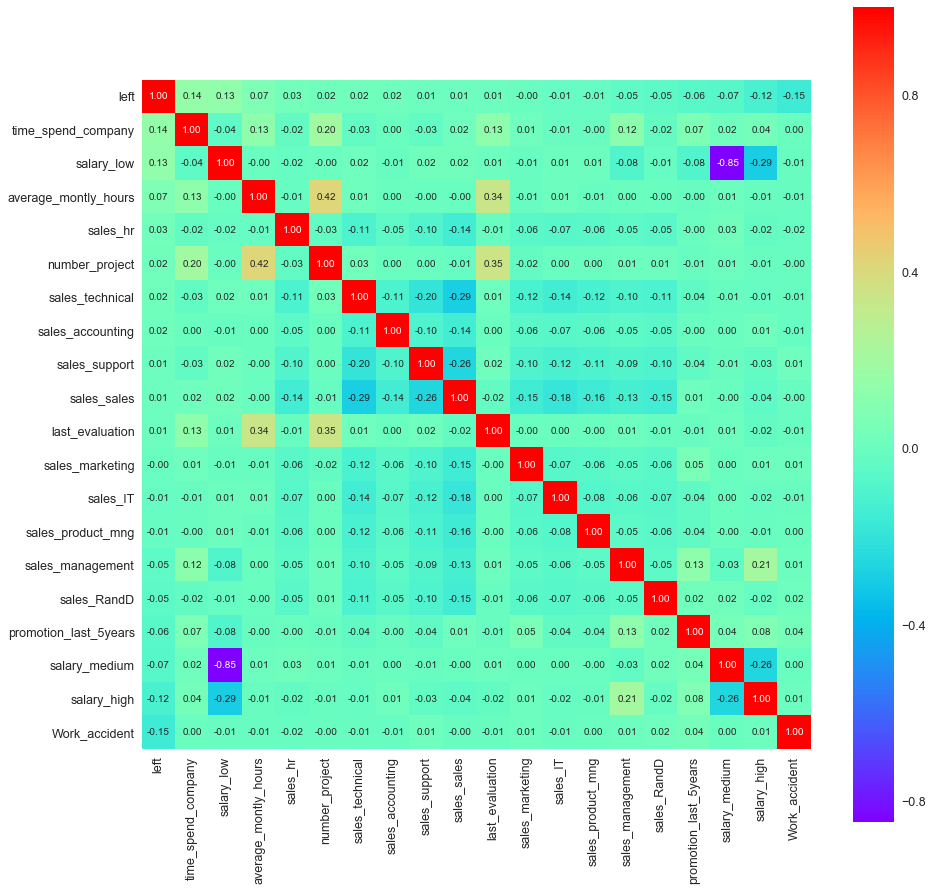

In [8]:
k = 20 #number of variables for heatmap
corrmat = df_dum.corr()
cols = corrmat.nlargest(k, 'left')['left'].index
cm = np.corrcoef(df_dum[cols].values.T)

plt.figure(figsize=(15,15)) #可以調整大小

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values, cmap='rainbow')
plt.show()

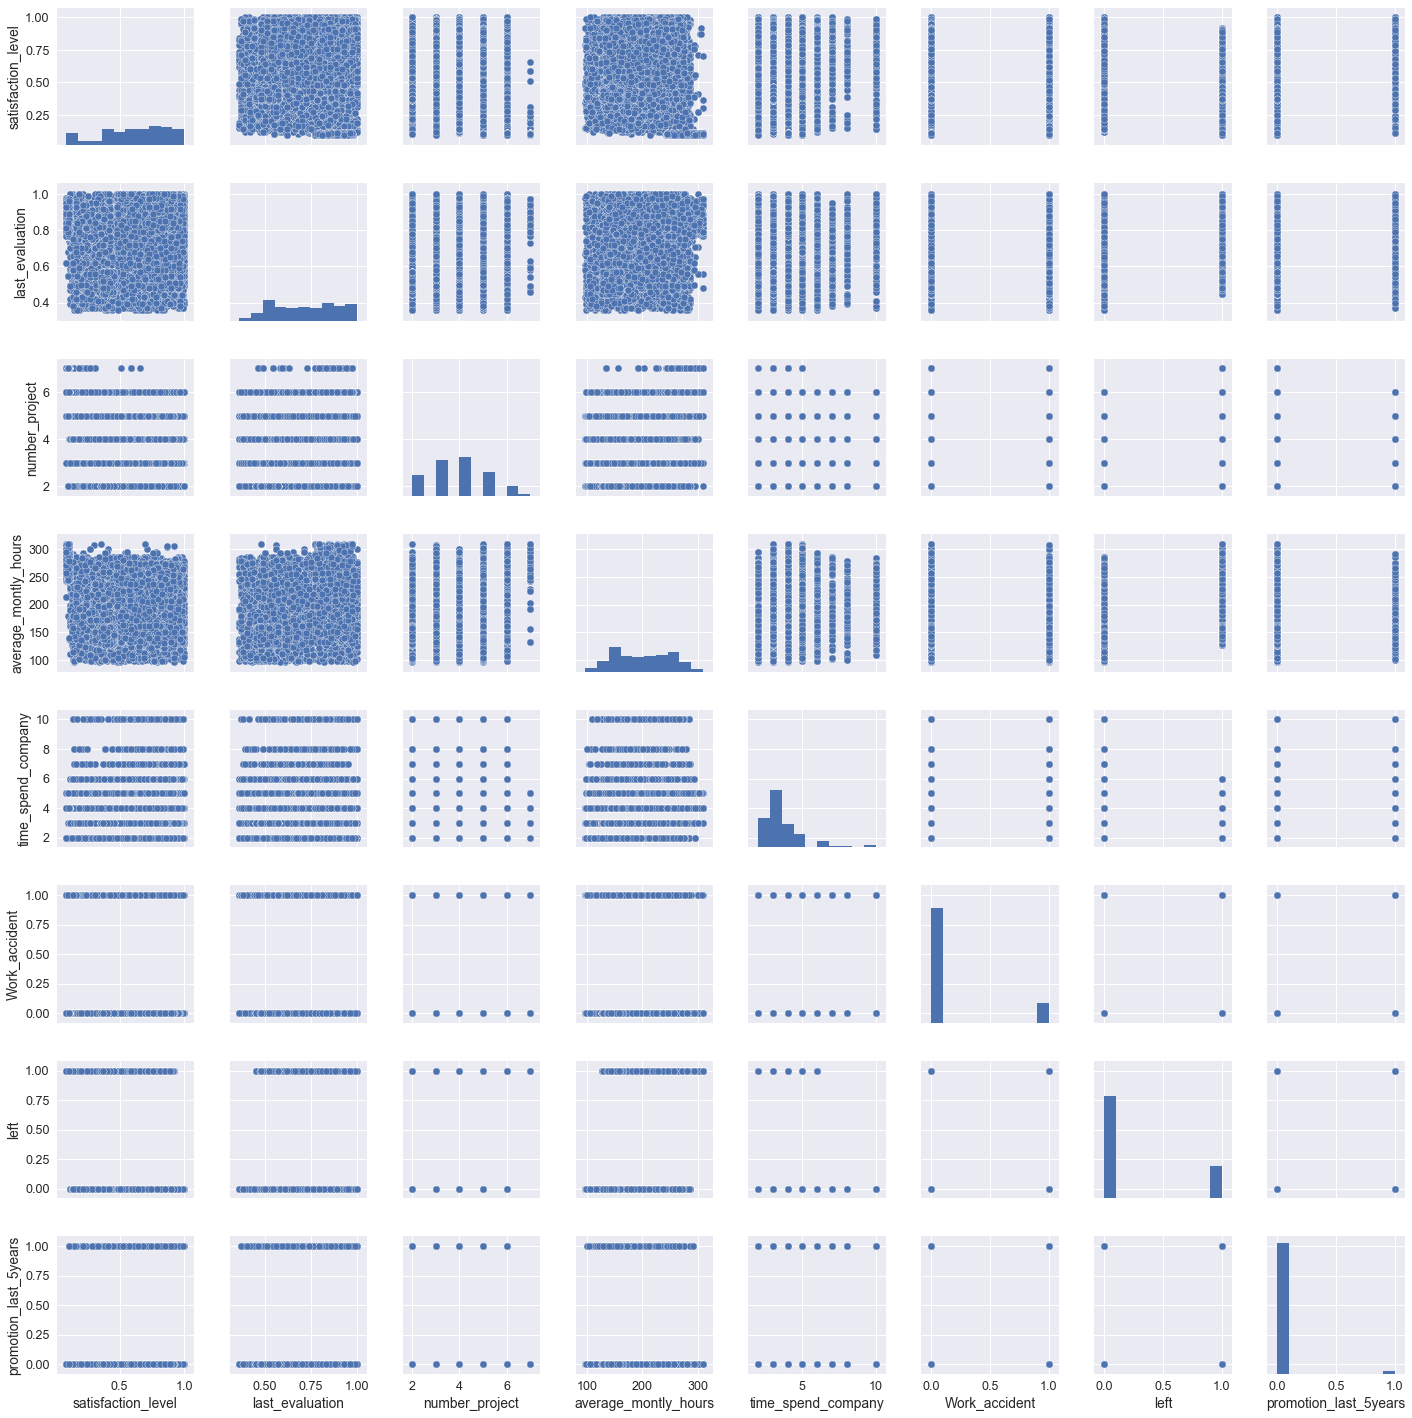

In [9]:
sns.pairplot(df_full) #看不出以什麼意義的圖XD
plt.show()

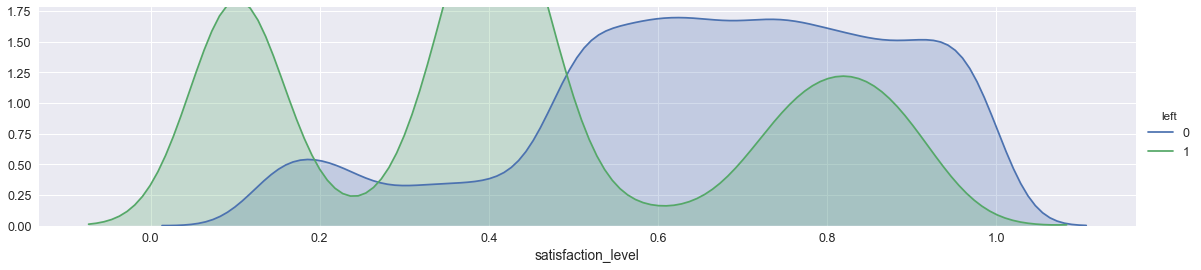

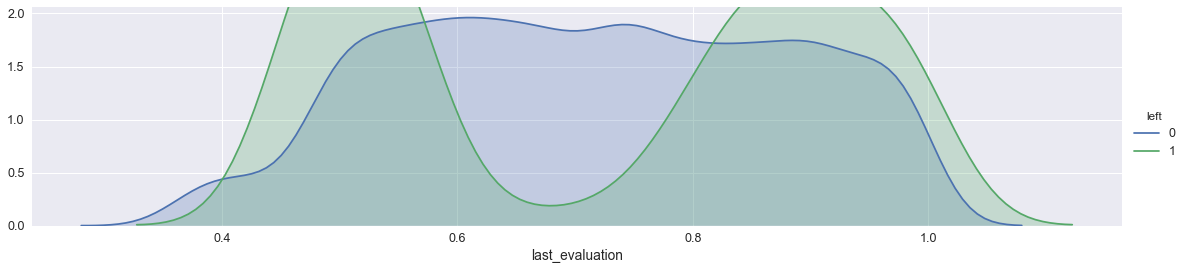

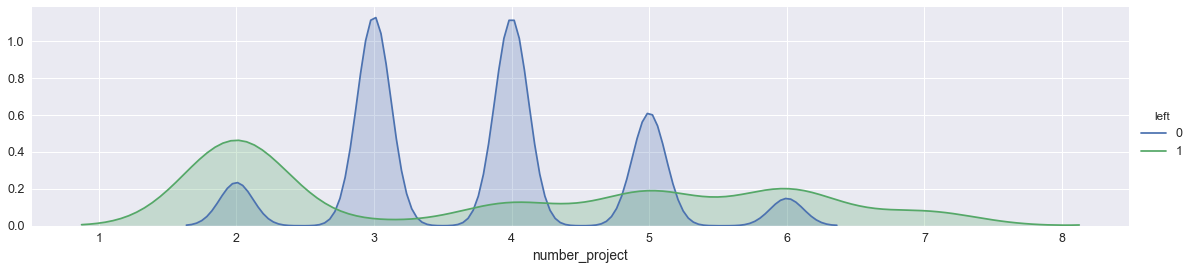

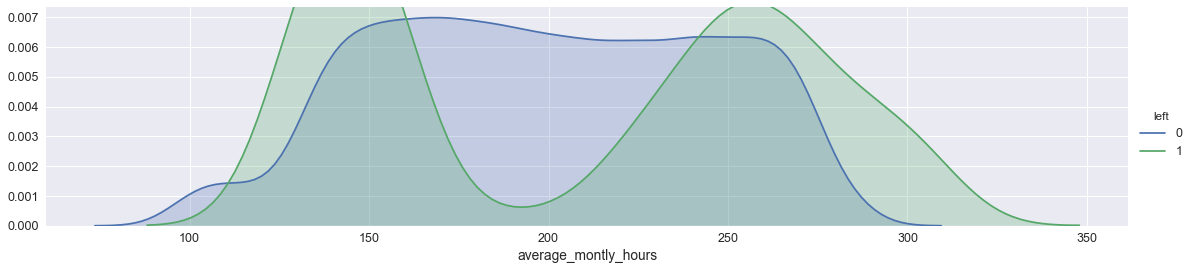

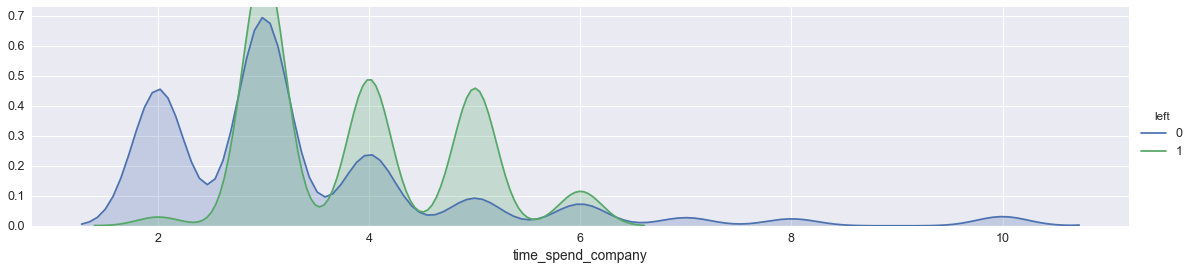

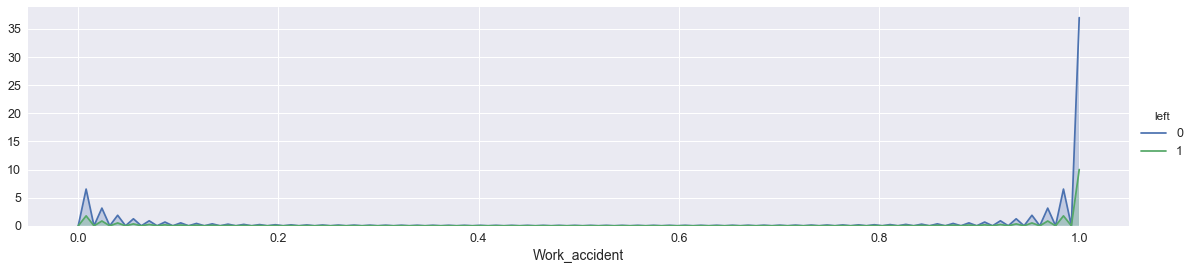

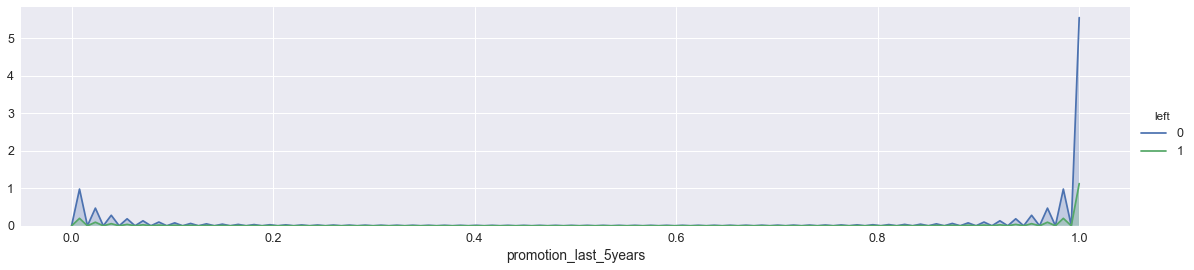

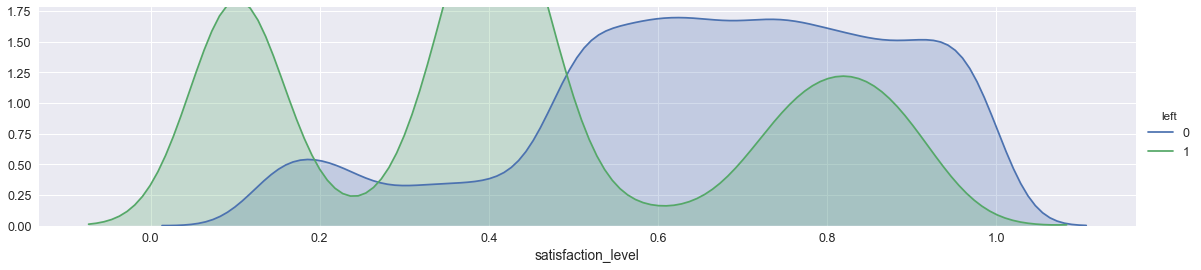

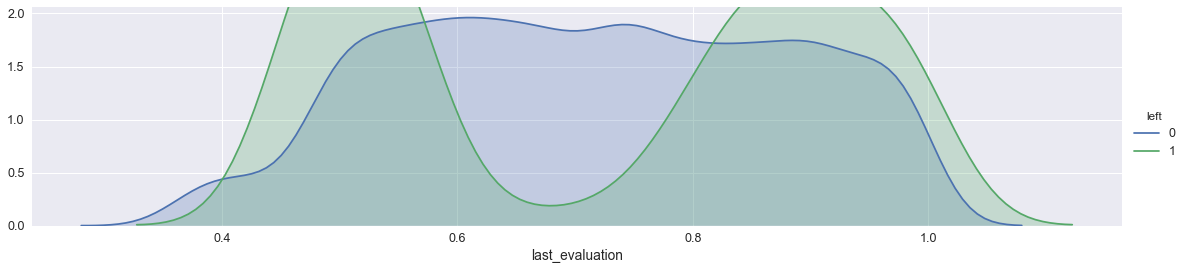

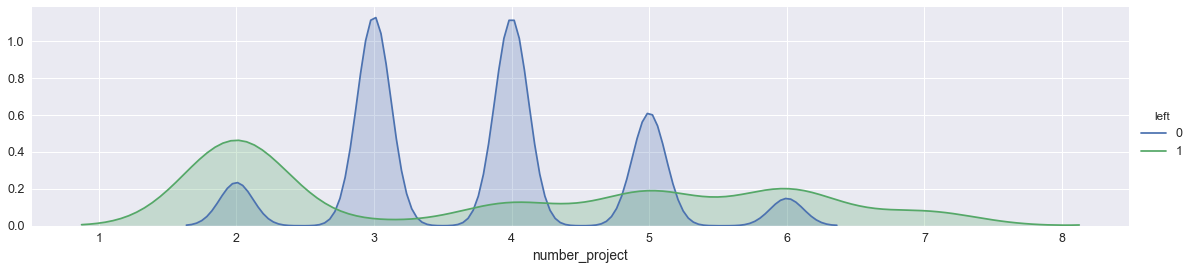

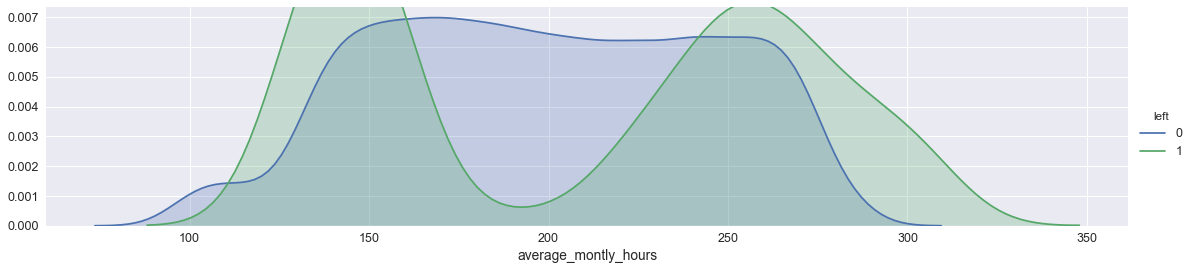

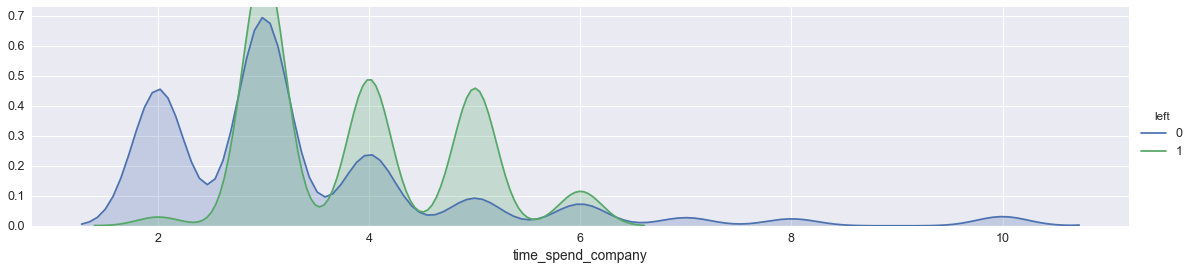

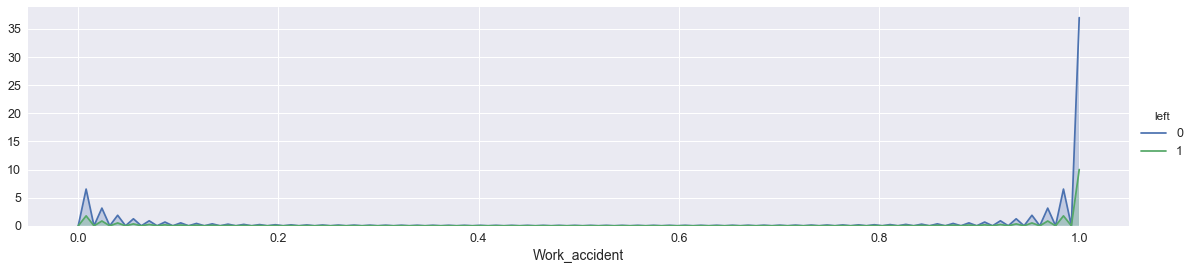

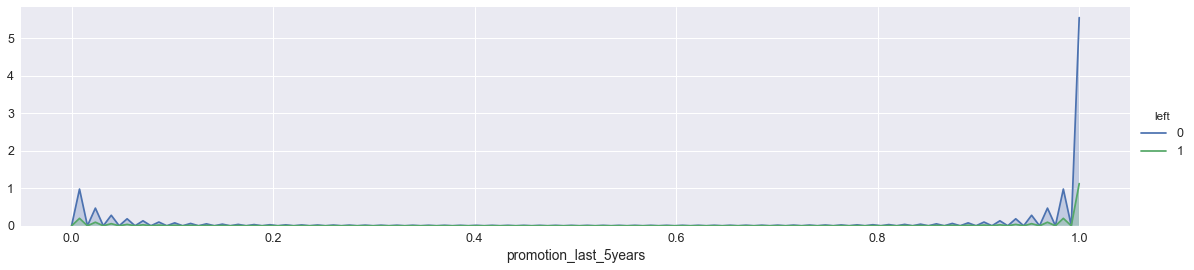

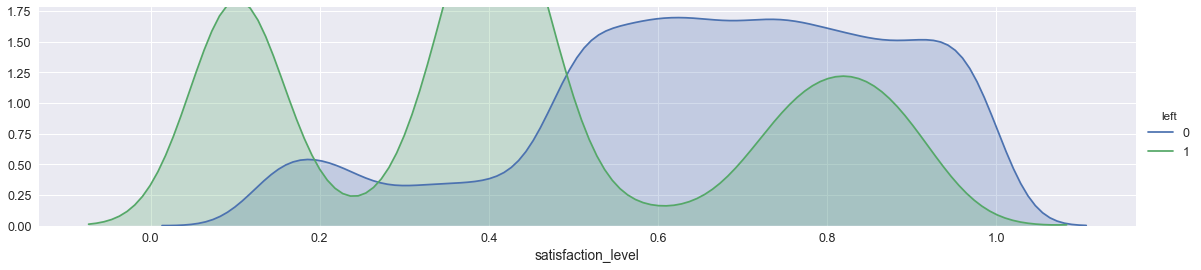

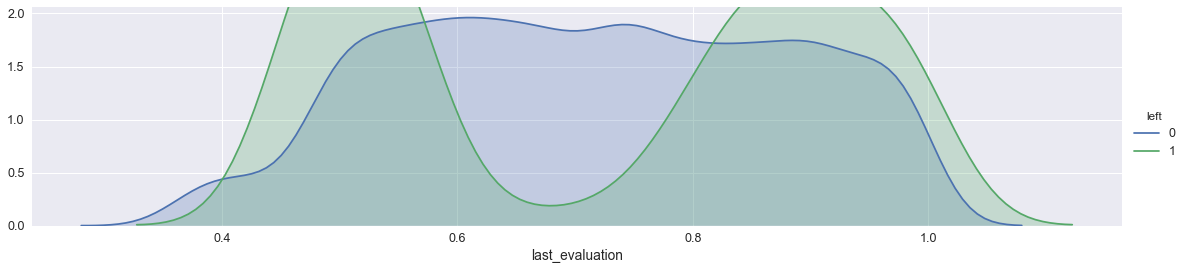

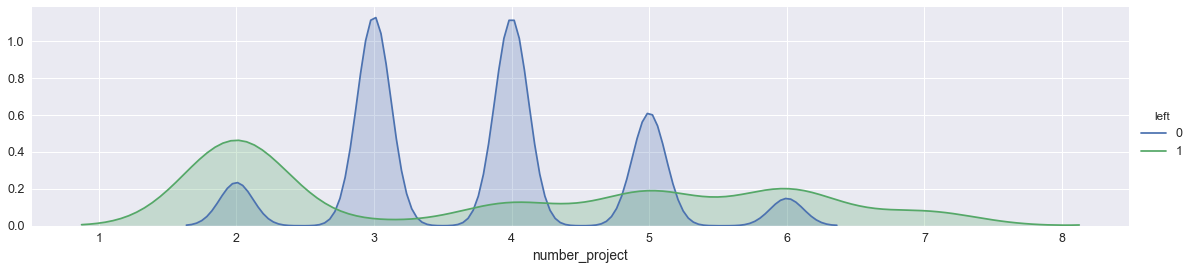

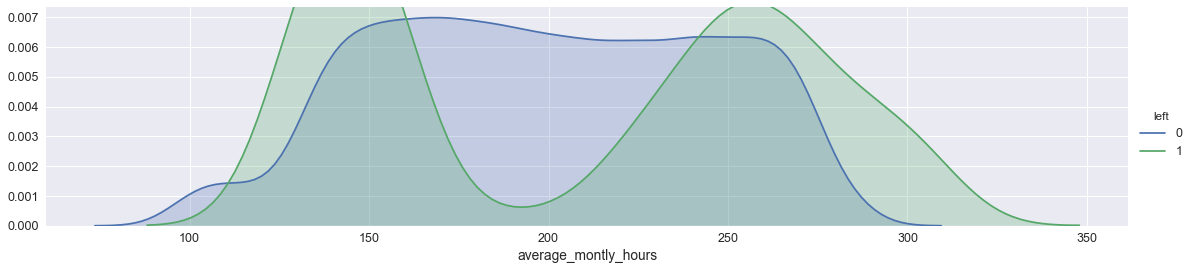

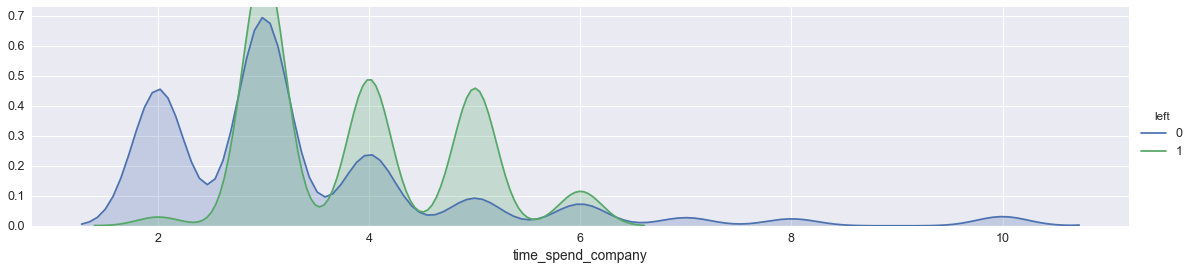

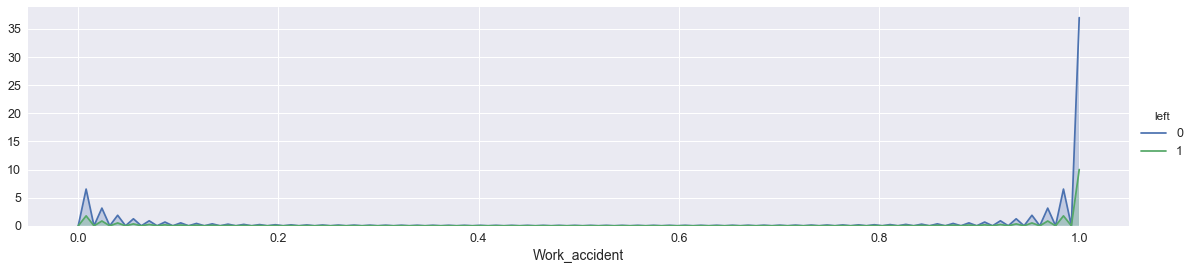

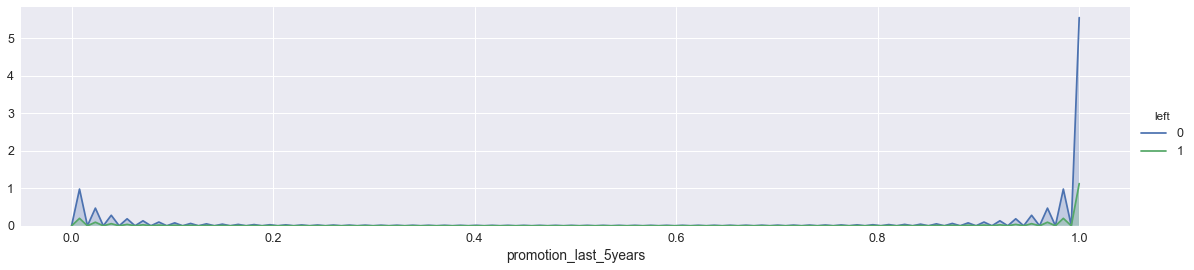

In [14]:
# 直接瀏覽全部的numeric column和left的關係

cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']

for col in cols:
    #Stratified
    facet = sns.FacetGrid(df_full, hue='left', aspect=4, size=4)
    facet.map(sns.kdeplot, col ,shade= True)
    facet.set()
    facet.add_legend()
    plt.show()

# Data preprocessing: 洗牌，切feature/label，切train/test

In [15]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_dum, random_state=42)

df_label = shuffle_df['left']
df_feature = shuffle_df.drop('left', axis=1)

In [16]:
train_feature = np.array(df_feature.values[:10000,:])
train_label = np.array(df_label.values[:10000])
test_feature = np.array(df_feature.values[10000:,:])
test_label = np.array(df_label.values[10000:])

In [32]:
train_feature.shape

(10000, 20)

In [33]:
train_label.shape

(10000,)

In [17]:
scaler = MinMaxScaler()

scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

# Keras MLP model: binary classification

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               4200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 44,601
Trainable params: 44,601
Non-trainable params: 0
_________________________________________________________________
None
Train on 1999 samples, validate on 8001 samples
Epoch 1/300
1999/1999 [==============================] - 0s - loss: 0.6939 - acc: 0.4

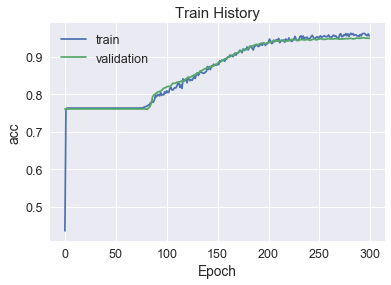

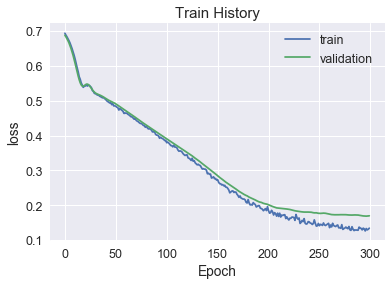

4416/4999 [=========================>....] - ETA: 0s

accuracy= 0.948789757952
4864/4999 [============================>.] - ETA: 0s

In [33]:
######################### 建立模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt 
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential() #一層一層到底，按順序

#輸入層（隱藏層1）
model.add(Dense(units=200, 
                input_dim=20, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#隱藏層2，不用寫input_dim，因為就是前一層的units
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#輸出層
model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary()) #可以清楚看到model還有參數數量

model.compile(loss='binary_crossentropy',   #二元用binary
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label,  #上面多分割一步在keras是內建的
                          validation_split=0.8, epochs=300, 
                          batch_size=2000, verbose=1) #verbose=2表示顯示訓練過程

######################### 訓練過程視覺化
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction = model.predict_classes(test_feature_trans)

#儲存訓練結果
#model.save_weights("Keras_HRanalytics_MLP.h5")
#print('model saved to disk')

# Train/Test score

In [34]:
df_ans = pd.DataFrame({'Real Class' :test_label})
df_ans['Prediction'] = prediction

In [35]:
df_ans[ df_ans['Real Class'] != df_ans['Prediction'] ].head()

,Real Class,Prediction
3,1,0
23,0,1
43,0,1
46,0,1
48,1,0


## Confusion Matrix

total test case number:  4999


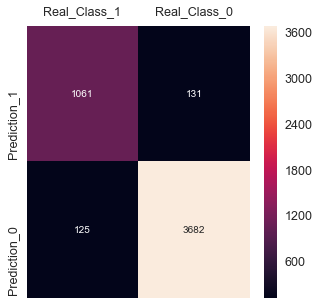

In [36]:
import seaborn as sns
%matplotlib inline

cols = ['Real_Class_1','Real_Class_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 0)])
B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 0)])

conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

In [37]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  4999
G1P1:  1061
G0P1:  131
G1P0:  125
G0P0:  3682
##########################
sensitivity:  0.894603709949
specificity:  0.967165747308
false_positive_rate:  0.0343561500131
false_negative_rate:  0.105396290051


(4999,
 0.89460370994940974,
 0.96716574730759131,
 0.034356150013113033,
 0.10539629005059022)

## ROC curve

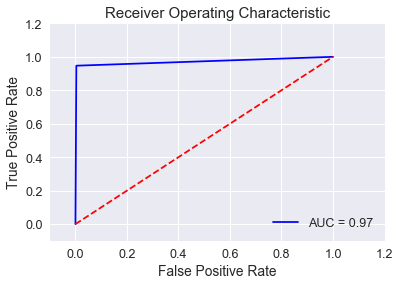

In [38]:
# Compute ROC curve and ROC area for each class

false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Scikit-Learn: DecisionTreeClassifier（打敗MLP model）

In [39]:
from sklearn import datasets,cross_validation,tree

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

Traing Score:0.992600
Testing Score:0.973195


In [40]:
prediction2 = clf.predict(test_feature_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      3813
          1       0.93      0.96      0.94      1186

avg / total       0.97      0.97      0.97      4999

[[3730   83]
 [  51 1135]]


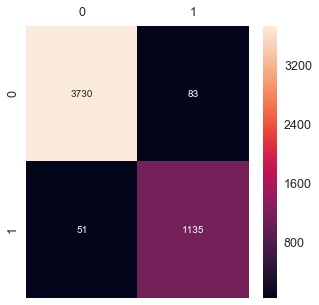

In [41]:
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

In [42]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

total_num:  4999
G1P1:  3730
G0P1:  83
G1P0:  51
G0P0:  1135
##########################
sensitivity:  0.986511504893
specificity:  0.956998313659
false_positive_rate:  0.068144499179
false_negative_rate:  0.0134884951071


(4999,
 0.98651150489288553,
 0.95699831365935917,
 0.068144499178981938,
 0.01348849510711452)

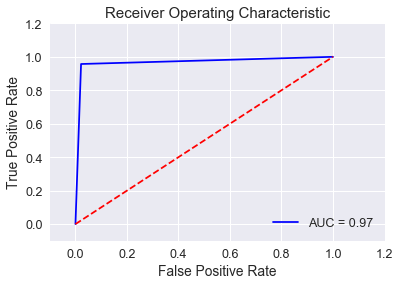

In [43]:
# Compute ROC curve and ROC area for each class

false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
tree.export_graphviz(clf, out_file='tree.dot') 

# Scikit-Learn: RandomForestClassifier（最強）

In [45]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

Traing Score:0.994800
Testing Score:0.986197


In [46]:
prediction2 = clf.predict(test_feature_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3813
          1       0.99      0.95      0.97      1186

avg / total       0.99      0.99      0.99      4999

[[3801   12]
 [  57 1129]]


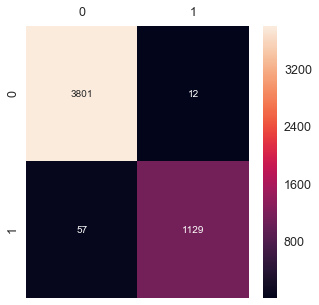

In [47]:
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

In [48]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

total_num:  4999
G1P1:  3801
G0P1:  12
G1P0:  57
G0P0:  1129
##########################
sensitivity:  0.985225505443
specificity:  0.951939291737
false_positive_rate:  0.0105170902717
false_negative_rate:  0.0147744945568


(4999,
 0.98522550544323484,
 0.95193929173693081,
 0.010517090271691499,
 0.014774494556765163)

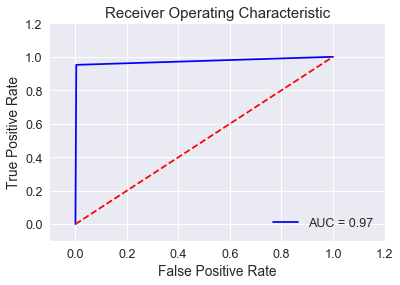

In [49]:
# Compute ROC curve and ROC area for each class

false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Scikit-learn: SVC(弱)

In [50]:
from sklearn import datasets,cross_validation,svm

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=svm.SVC()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

Traing Score:0.812500
Testing Score:0.816563


In [52]:
prediction2 = clf.predict(test_feature_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       0.81      0.99      0.89      3813
          1       0.87      0.27      0.41      1186

avg / total       0.83      0.82      0.78      4999

[[3767   46]
 [ 871  315]]


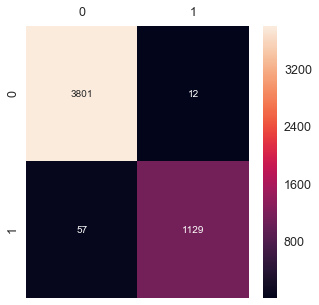

In [51]:
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

In [52]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

total_num:  4999
G1P1:  3801
G0P1:  12
G1P0:  57
G0P0:  1129
##########################
sensitivity:  0.985225505443
specificity:  0.951939291737
false_positive_rate:  0.0105170902717
false_negative_rate:  0.0147744945568


(4999,
 0.98522550544323484,
 0.95193929173693081,
 0.010517090271691499,
 0.014774494556765163)

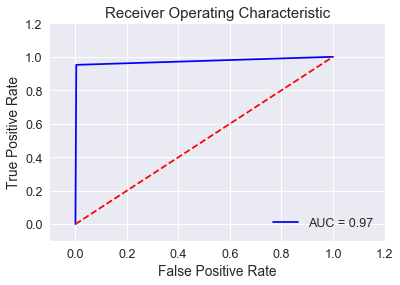

In [53]:
# Compute ROC curve and ROC area for each class

false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Scikit-Learn: Naive-Bayesian.BernoulliNB （弱）

In [54]:
from sklearn import datasets,cross_validation,naive_bayes

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=naive_bayes.BernoulliNB()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

Traing Score:0.838900
Testing Score:0.843369


In [55]:
prediction2 = clf.predict(test_feature_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       0.85      0.96      0.90      3813
          1       0.79      0.46      0.58      1186

avg / total       0.84      0.84      0.83      4999

[[3669  144]
 [ 639  547]]


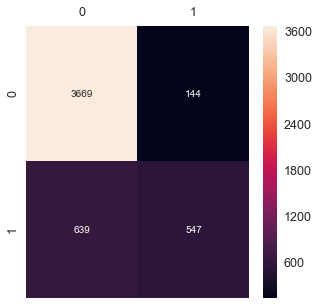

In [56]:
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

In [63]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

total_num:  4999
G1P1:  3669
G0P1:  144
G1P0:  639
G0P0:  547
##########################
sensitivity:  0.851671309192
specificity:  0.461214165261
false_positive_rate:  0.208393632417
false_negative_rate:  0.148328690808


(4999,
 0.85167130919220058,
 0.46121416526138281,
 0.20839363241678727,
 0.14832869080779945)

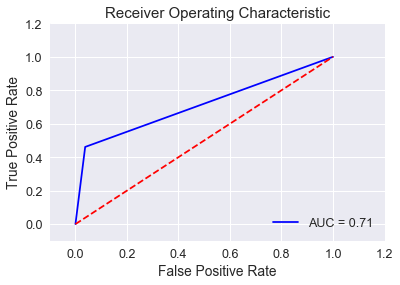

In [57]:
# Compute ROC curve and ROC area for each class
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()